In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
dataset = pd.read_csv('binary_log.csv')

In [3]:
dataset

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [4]:
dataset['Admitted'] = dataset['Admitted'].map({'Yes':1,'No':0})

In [5]:
dataset['Gender'] = dataset['Gender'].map({'Female':1,'Male':0})

In [6]:
dataset

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


In [7]:
X = dataset.iloc[:,[0,2]].values

In [8]:
X

array([[1363,    0],
       [1792,    1],
       [1954,    1],
       [1653,    0],
       [1593,    0],
       [1755,    1],
       [1775,    1],
       [1887,    1],
       [1893,    1],
       [1580,    0],
       [1857,    1],
       [1880,    1],
       [1664,    1],
       [1364,    0],
       [1693,    0],
       [1850,    1],
       [1633,    0],
       [1634,    0],
       [1636,    1],
       [1855,    1],
       [1987,    1],
       [1997,    0],
       [1422,    1],
       [1508,    1],
       [1720,    1],
       [1879,    0],
       [1634,    1],
       [1802,    0],
       [1849,    1],
       [1764,    1],
       [1460,    0],
       [1675,    1],
       [1656,    0],
       [2020,    0],
       [1850,    0],
       [1865,    0],
       [1664,    0],
       [1872,    1],
       [1654,    0],
       [1393,    1],
       [1587,    0],
       [1631,    1],
       [1931,    0],
       [1370,    0],
       [1810,    0],
       [1414,    0],
       [1761,    1],
       [1477,

In [9]:
y = dataset.iloc[:,1].values

In [10]:
y

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
X_train.shape

(134, 2)

In [14]:
X_test.shape

(34, 2)

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim=2))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])

In [24]:
model.fit(X_train,y_train,epochs=300)

Epoch 1/300
5/5 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5597 - precision: 0.5597 - recall: 1.0000 - auc: 0.5000
Epoch 2/300
5/5 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5597 - precision: 0.5597 - recall: 1.0000 - auc: 0.5000
Epoch 3/300
5/5 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5597 - precision: 0.5597 - recall: 1.0000 - auc: 0.5000
Epoch 4/300
5/5 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5597 - precision: 0.5597 - recall: 1.0000 - auc: 0.5000
Epoch 5/300
5/5 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5597 - precision: 0.5597 - recall: 1.0000 - auc: 0.5000
Epoch 6/300
5/5 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5597 - precision: 0.5597 - recall: 1.0000 - auc: 0.5000
Epoch 7/300
5/5 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5597 - precision: 0.

In [27]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5588 - precision: 0.5588 - recall: 1.0000 - auc: 0.5000


[0.6862332820892334, 0.5588235259056091, 0.5588235259056091, 1.0, 0.5]

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred

array([[0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516],
       [0.5621516]], dtype=float32)

In [31]:
y_pred = y_pred.round()

In [32]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [33]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 0, 15],
       [ 0, 19]], dtype=int64)

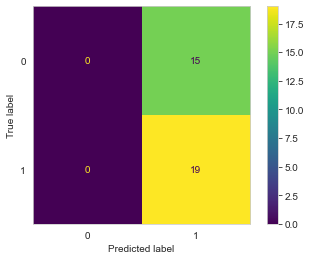

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.56      1.00      0.72        19

    accuracy                           0.56        34
   macro avg       0.28      0.50      0.36        34
weighted avg       0.31      0.56      0.40        34



C:\Users\NUPUR SRIVASTAVA\.conda\envs\deepl\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NUPUR SRIVASTAVA\.conda\envs\deepl\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NUPUR SRIVASTAVA\.conda\envs\deepl\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)